<a href="https://colab.research.google.com/github/salhahCS/My-codes/blob/main/Decision_Boundary_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn


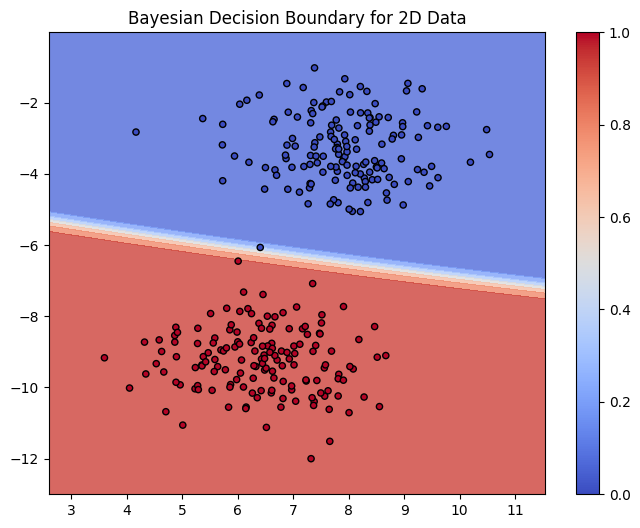

In [4]:
import numpy as np                   # Import NumPy for numerical operations
import matplotlib.pyplot as plt      # Import matplotlib for plotting
from sklearn.datasets import make_blobs  # Import function to generate synthetic data
from sklearn.naive_bayes import GaussianNB  # Import Gaussian Naive Bayes model

# Generate synthetic two-dimensional data
X, y = make_blobs(n_samples=300, centers=2, random_state=6, n_features=2)

# Instantiate and fit the Gaussian Naive Bayes classifier
model = GaussianNB()
model.fit(X, y)  # Train the model on the synthetic data

# Create a meshgrid for the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # Determine the range for the first feature
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Determine the range for the second feature
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),  # Create a meshgrid for the x-axis
                     np.linspace(y_min, y_max, 300))  # Create a meshgrid for the y-axis

# Predict class probabilities over the meshgrid
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]  # Predict probabilities for class 1
Z = Z.reshape(xx.shape)  # Reshape the probabilities back into the meshgrid shape

# Plot the results
plt.figure(figsize=(8, 6))  # Set the figure size
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)  # Create a contour plot with the probabilities
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.coolwarm)  # Plot the original data points
plt.title('Bayesian Decision Boundary for 2D Data')  # Set the title of the plot
plt.colorbar()  # Add a color bar to the plot
plt.show()  # Display the plot
